In [77]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [79]:
ticker = ["EURUSD=X"]
start_date = "2022-01-01"
end_date = "2024-08-30"
data = yf.download(ticker, start = start_date, end=end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
Date,,,,,,
2022-01-03 00:00:00+00:00,1.137346,1.137346,1.137592,1.128541,1.137385,0
2022-01-04 00:00:00+00:00,1.130224,1.130224,1.132300,1.127345,1.130199,0
2022-01-05 00:00:00+00:00,1.128363,1.128363,1.134559,1.127764,1.128541,0
2022-01-06 00:00:00+00:00,1.131350,1.131350,1.133067,1.128554,1.131222,0
2022-01-07 00:00:00+00:00,1.129688,1.129688,1.135976,1.129050,1.129586,0


## z-score strategy: buy if Z<1.5 and sell if z>1.5

In [82]:
data["mean"] = data["Close"].iloc[:,0].rolling(window = 20).mean()
data["std"] = data["Close"].iloc[:,0].rolling(window = 20).std()
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,mean,std
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,,
Date,,,,,,,,
2024-08-23 00:00:00+00:00,1.111716,1.111716,1.119595,1.110679,1.111716,0,1.095388,0.010863
2024-08-26 00:00:00+00:00,1.118793,1.118793,1.120109,1.115287,1.118793,0,1.097059,0.011774
2024-08-27 00:00:00+00:00,1.116470,1.116470,1.117955,1.115126,1.116470,0,1.098785,0.011971
2024-08-28 00:00:00+00:00,1.117793,1.117793,1.118193,1.110543,1.117793,0,1.100594,0.011972
2024-08-29 00:00:00+00:00,1.112496,1.112496,1.114020,1.105632,1.112496,0,1.102100,0.011444


In [84]:
data["z"] = (data["Close"].iloc[:,0] - data["mean"]) / data["std"]

data["Signal"]=0
data.loc[data["z"]>1.5, "Signal"] = -1
data.loc[data["z"]<-1.5, "Signal"] = 1

data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,mean,std,z,Signal
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,,,,
Date,,,,,,,,,,
2024-08-23 00:00:00+00:00,1.111716,1.111716,1.119595,1.110679,1.111716,0,1.095388,0.010863,1.503127,-1
2024-08-26 00:00:00+00:00,1.118793,1.118793,1.120109,1.115287,1.118793,0,1.097059,0.011774,1.846024,-1
2024-08-27 00:00:00+00:00,1.116470,1.116470,1.117955,1.115126,1.116470,0,1.098785,0.011971,1.477371,0
2024-08-28 00:00:00+00:00,1.117793,1.117793,1.118193,1.110543,1.117793,0,1.100594,0.011972,1.436548,0
2024-08-29 00:00:00+00:00,1.112496,1.112496,1.114020,1.105632,1.112496,0,1.102100,0.011444,0.908418,0


## Visualize the strategy

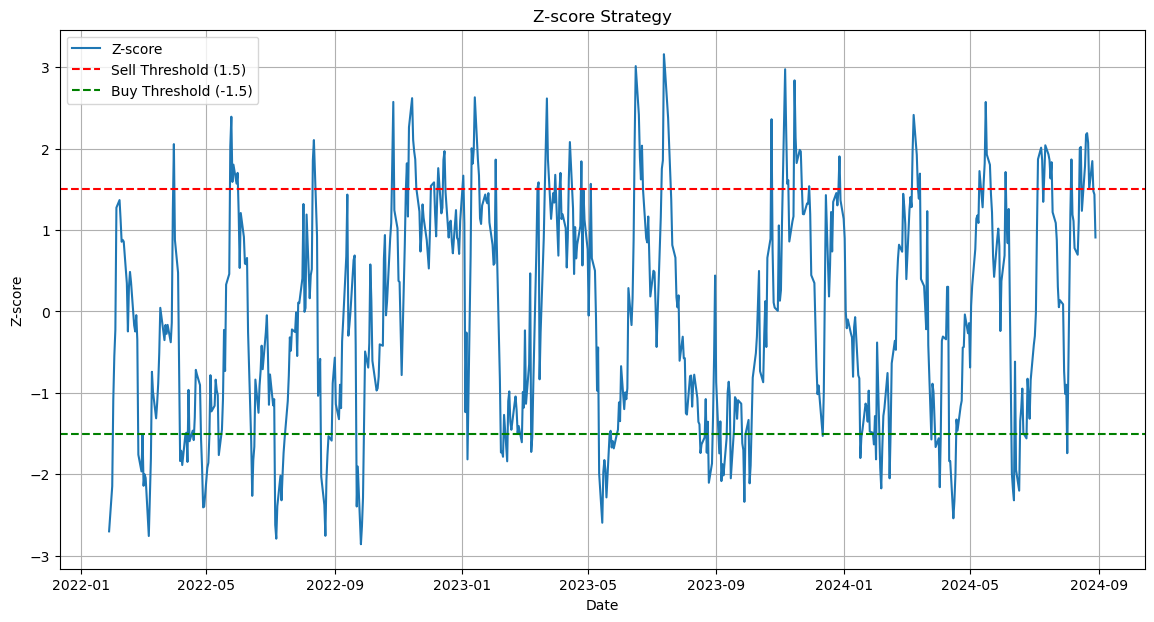

In [87]:
plt.figure(figsize=(14,7))
plt.plot(data.index, data["z"], label = "Z-score")
plt.axhline(1.5, label = "Sell Threshold (1.5)", color = "red", linestyle = "--")
plt.axhline(-1.5, label = "Buy Threshold (-1.5)", color = "green", linestyle = "--")

plt.title("Z-score Strategy")
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.legend()
plt.grid(True)
plt.show()

## Backtesting - cummulative return

In [90]:
data["Daily_Return"] = np.log(data["Close"].iloc[:,0] / data["Close"].iloc[:,0].shift(1))
# data["Daily_Return"] = data["Close"].iloc[:,0].pct_change()

data["Strategy_Return"] = data["Daily_Return"] * data["Signal"].shift(1)

data["Cummulative_Return"] = (1+data["Strategy_Return"]).cumprod() - 1 

data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,mean,std,z,Signal,Daily_Return,Strategy_Return,Cummulative_Return
Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,,,,,,,
Date,,,,,,,,,,,,,
2024-08-23 00:00:00+00:00,1.111716,1.111716,1.119595,1.110679,1.111716,0,1.095388,0.010863,1.503127,-1,-0.003430,0.003430,0.040653
2024-08-26 00:00:00+00:00,1.118793,1.118793,1.120109,1.115287,1.118793,0,1.097059,0.011774,1.846024,-1,0.006346,-0.006346,0.034049
2024-08-27 00:00:00+00:00,1.116470,1.116470,1.117955,1.115126,1.116470,0,1.098785,0.011971,1.477371,0,-0.002079,0.002079,0.036199
2024-08-28 00:00:00+00:00,1.117793,1.117793,1.118193,1.110543,1.117793,0,1.100594,0.011972,1.436548,0,0.001184,0.000000,0.036199
2024-08-29 00:00:00+00:00,1.112496,1.112496,1.114020,1.105632,1.112496,0,1.102100,0.011444,0.908418,0,-0.004751,-0.000000,0.036199


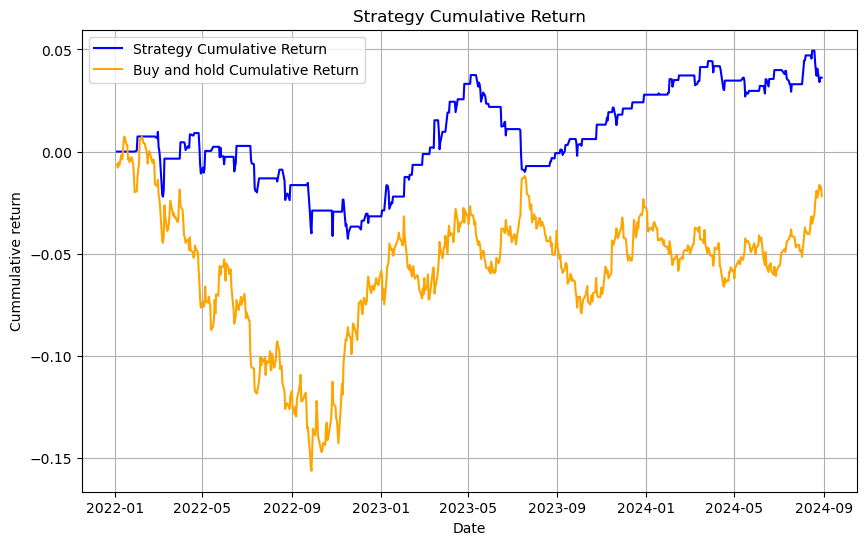

In [92]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data["Cummulative_Return"], label="Strategy Cumulative Return", color="blue")
plt.plot(data.index, (1+data["Close"].pct_change()).cumprod() - 1, label="Buy and hold Cumulative Return", color="orange")
plt.title("Strategy Cumulative Return")
plt.xlabel("Date")
plt.ylabel("Cummulative return")
plt.legend()
plt.grid()
plt.show()

## Metric to evaluate strategy performance

In [95]:
# calculate annulized return
trading_days = 252
annualized_return = data["Strategy_Return"].mean() * trading_days
print(f"Annualized Return: {annualized_return: .2f}")

# calculate annulized volatility
annualized_vol = data["Strategy_Return"].std() * np.sqrt(trading_days)
print(f"Annualized volatility: {annualized_vol: .2f}")

# calculate Sharpe Ratio
Sharpe_Ratio = annualized_return / annualized_vol
print(f"Sharpe ratio: {Sharpe_Ratio: .2f}")

# calculate maximum drawndown
data["cummulative_return_max"] = data["Cummulative_Return"].cummax()
drawdown = (data["Cummulative_Return"] - data["cummulative_return_max"])/data["cummulative_return_max"]
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown: .2%}")

Annualized Return:  0.01
Annualized volatility:  0.04
Sharpe ratio:  0.32
Maximum Drawdown: -541.95%
